In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Path ke model yang disimpan dalam format .h5
model_path = "./models/v3_last.h5"

# Memuat model
model = load_model(model_path)

# Path ke direktori dataset
test_dir = "./dataset/rgb_masking/val"

# Membuat objek ImageDataGenerator untuk data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model pada data uji
loss, accuracy, precision, recall = model.evaluate(test_generator)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Found 315 images belonging to 3 classes.


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.9480 - loss: 0.1263 - precision: 0.9480 - recall: 0.9480
Loss: 0.1236417219042778
Accuracy: 0.9555555582046509
Precision: 0.9555555582046509
Recall: 0.9555555582046509


Found 315 images belonging to 3 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step
Accuracy: 0.9651
Precision: 0.9684
Recall: 0.9651


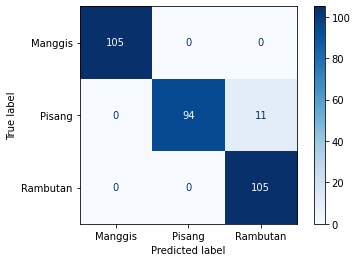

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score


model = tf.keras.models.load_model("./models/v3.keras")
datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',  # Assuming sparse labels
    shuffle=False
)

# Get the true labels from the generator
true_labels = validation_generator.classes

# Predict the classes for the validation data
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed
recall = recall_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed

# Print accuracy, precision, and recall
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predictions for ./dataset/rgb/train/Manggis/IMG_3078.jpg: Manggis

Confidence result: 
Manggis 	:   1.0
Pisang 	:   1.0309747e-18
Rambutan 	:   1.6925415e-35


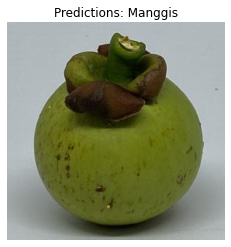

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predictions for ./dataset/rgb/train/Pisang/IMG_5736.jpg: Manggis

Confidence result: 
Manggis 	:   1.0
Pisang 	:   1.9498679e-25
Rambutan 	:   0.0


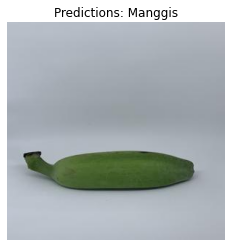

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions for ./dataset/rgb/train/Rambutan/IMG20231216192531.jpg: Manggis

Confidence result: 
Manggis 	:   1.0
Pisang 	:   2.9808844e-31
Rambutan 	:   0.0


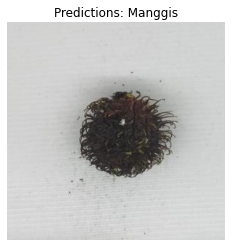

In [19]:
# Load the saved model
model = tf.keras.models.load_model('./models/v3.keras')

def preprocess_image(img_path):
    # Convert image to RGB format and save as JPEG if needed
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img.save(img_path.replace('.png', '.jpg'), 'JPEG')

    # Load and resize the image
    img = image.load_img(img_path.replace('.png', '.jpg'), target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# List of image paths
img_paths = [
    './dataset/rgb/train/Manggis/IMG_3078.jpg',           # Manggis
    './dataset/rgb/train/Pisang/IMG_5736.jpg',            # Pisang
    './dataset/rgb/train/Rambutan/IMG20231216192531.jpg'  # Rambutan
]

# Labels for the classes
labels = ['Manggis', 'Pisang', 'Rambutan']

# Process and predict each image
for img_path in img_paths:
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    print(f"Predictions for {img_path}: {labels[predicted_index]}")
    
    # Print confidence results for each class
    print("\nConfidence result: ")
    for i, j in enumerate(predictions[0]):
        print(labels[i], "\t:  ", j)
    
    # Display the image with the prediction title
    plt.imshow(image.load_img(img_path.replace('.png', '.jpg')))
    plt.title(f'Predictions: {labels[predicted_index]}')
    plt.axis('off')
    plt.show()

